# PCA analysis simulation

## Generate 1000 randomly distributed data points with x and y two features/dimensions
Let X be the m*n data matrix with m rows (data points) and n columns (centered variables, or features). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import multivariate_normal
# import scipy.linalg as la
plt.rcParams['figure.figsize'] = [12, 6]

xC = np.array([2, 1])      # Center of data
sig = np.array([2, 0.5])   # Principal axes
theta = np.pi/4            # Rotate by pi/4
R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

m = 1000           # Create 1,000 points          @ = matrix multiplication
n = 2               # 2 features/dimensions
data = R @ np.diag(sig) @ np.random.randn(n,m) + np.diag(xC) @ np.ones((n,m))

# Center the n features around 0 (subtract m means)
mean = np.mean(data, axis=1)          # Compute mean
# X = data - np.tile(mean,(m,1)).T      # Mean-subtracted data
X = (data - np.tile(mean,(m,1)).T).T      # Mean-subtracted data

## Calculate the first principle component and project the data points onto it
Let V be the n*p matrix of p eigenvectors that with the largest p eigenvalues. Then the m * p matrix of PCA projections will be simply given by Z=XV.

In [2]:
# Calculate the covariance matrix
cov  = np.cov(data)

# Calculate the unit eigenvectors and eigenvalues of the covariance matrix
w, v = np.linalg.eig(cov)

# Keep the p(<n) eigenvectors with the largest eigenvalues
# get the indices of the largest eigenvalues in decending order
p = len(w)
p_index = (-w).argsort()[:p]

pc1 = v[:,p_index[0]]
pc2 = v[:,p_index[1]]

# V = pc1
V = pc1[:,None]

# Matrix multiply the p eigenvectors with the centered features to get a
# new set of features with only p features
Z = X@V

## Reconstruct the original points from this one principal component
X_reconstruction = Z*V.T = X*V*V.T

In [3]:
VT = V.T
X_reconstruction = Z@VT

### Figure 1: simulated data points and first principal axis

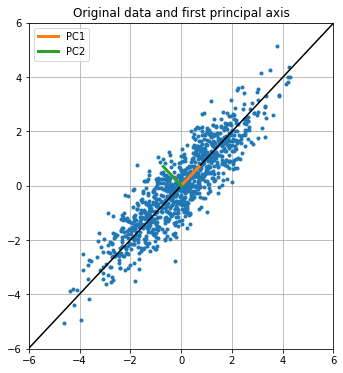

In [4]:
# Find equations of lines for graphing
# x,y of pc
x_pc1 = np.array([0, pc1[0]])
y_pc1 = np.array([0, pc1[1]])

x_pc2 = np.array([0, pc2[0]])
y_pc2 = np.array([0, pc2[1]])

# Calculate the coefficients.
coefficients1 = np.polyfit(x_pc1, y_pc1, 1)
coefficients2 = np.polyfit(x_pc2, y_pc2, 1)

#compute the values of the line
polynomial1 = np.poly1d(coefficients1)
polynomial2 = np.poly1d(coefficients2)
x_pc1_axis = np.linspace(-6,6)
y_pc1_axis = polynomial1(x_pc1_axis)
x_pc2_axis = np.linspace(-6,6)
y_pc2_axis = polynomial2(x_pc2_axis)


#plot figure1
fig = plt.figure()
ax = fig.add_subplot(121)
# ax.plot(X[0,:], X[1,:], '.')
ax.plot(X[:,0], X[:,1], '.')
ax.grid()
plt.xlim((-6, 6))
plt.ylim((-6,6))
ax.plot(x_pc1_axis, y_pc1_axis, color='k')

#plot vectors
ax.plot([0, pc1[0]],[0, pc1[1]], linewidth=3, label='PC1')
ax.plot([0, pc2[0]],[0, pc2[1]], linewidth=3, label='PC2')
##plot pc2 axis
# ax.plot(x_pc2_axis, y_pc2_axis)

plt.legend(loc='upper left')
plt.title("Original data and first principal axis")
plt.show()

### Figure 2: Values of projections on the first principal axis

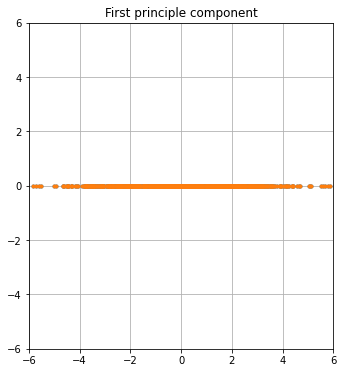

In [5]:
#plot figure2
y = np.zeros((m,n))
fig2 = plt.figure()
ax2 = fig2.add_subplot(121)
ax2.plot(Z[:], y[:], '.')
ax2.grid()
plt.xlim((-6, 6))
plt.ylim((-6, 6))

plt.title("First principle component")
plt.show()

### Figure 3: Reconstruction

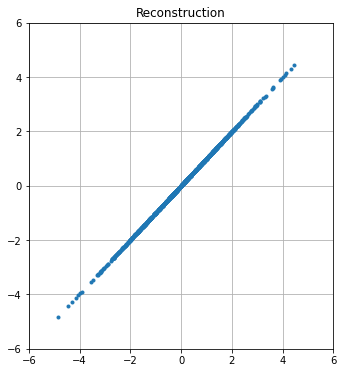

In [6]:
#plot figure3
fig3 = plt.figure()
ax3 = fig3.add_subplot(121)
# ax.plot(X[0,:], X[1,:], '.')
ax3.plot(X_reconstruction[:,0], X_reconstruction[:,1], '.')
ax3.grid()
plt.xlim((-6, 6))
plt.ylim((-6,6))

plt.title("Reconstruction")
plt.show()

### Thoughts
This task was difficult because I didn't know how to generate randomly distributed data points that had a shape similar to the one in your graph. The word 'random' really threw me off. That took quite a bit of time to figure out. Then I had trouble with Jupyter Notebook not updating my code correctly when it was running it and the covariants and eigenvalues/eigenvectors were not computing correctly. It worked when I started over with a new Jupyter Notebook. There was a lot of time wasted trying to "correct" code that was already correct. Python also doesn't work right with m-by-1 matrices unless you specify it like this: V[:,None]. Overall, task 3 of this assignment took 10 times as much time for me as it should have. Having some coding information on the slides would have been really helpful.